In [1]:
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np

data_wine = load_wine()
df_wine = pd.DataFrame(data_wine.data, columns = data_wine.feature_names)
df_wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [7]:
df_wine_std = df_wine.apply(lambda x: (x-x.mean())/x.std(), axis=0)
df_wine_std.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.514341,-0.560668,0.231400,-1.166303,1.908522,0.806722,1.031908,-0.657708,1.221438,0.251009,0.361158,1.842721,1.010159
1,0.245597,-0.498009,-0.825667,-2.483841,0.018094,0.567048,0.731565,-0.818411,-0.543189,-0.292496,0.404908,1.110317,0.962526
2,0.196325,0.021172,1.106214,-0.267982,0.088110,0.806722,1.212114,-0.497005,2.129959,0.268263,0.317409,0.786369,1.391224
3,1.686791,-0.345835,0.486554,-0.806975,0.928300,2.484437,1.462399,-0.979113,1.029251,1.182732,-0.426341,1.180741,2.328007
4,0.294868,0.227053,1.835226,0.450674,1.278379,0.806722,0.661485,0.226158,0.400275,-0.318377,0.361158,0.448336,-0.037767


In [16]:
from sklearn.decomposition import PCA
#n_components = number of df columns
pcamodel = PCA()
pcamodel.fit(df_wine_std)

#データを主成分に変換
pca_cor = pcamodel.transform(df_wine_std)
pca_cor

array([[ 3.30742097e+00, -1.43940225e+00, -1.65272830e-01, ...,
        -4.50293172e-01,  5.39289144e-01, -6.60523053e-02],
       [ 2.20324981e+00,  3.32455071e-01, -2.02075706e+00, ...,
        -1.42256019e-01,  3.87145650e-01,  3.62627319e-03],
       [ 2.50966069e+00, -1.02825072e+00,  9.80054055e-01, ...,
        -2.85866453e-01,  5.81931623e-04,  2.16554231e-02],
       ...,
       [-2.67030685e+00, -2.75313287e+00, -9.38295059e-01, ...,
         5.11050413e-01,  6.96800860e-01,  7.18749442e-02],
       [-2.38030254e+00, -2.29088437e+00, -5.49147119e-01, ...,
         2.98978585e-01,  3.38864757e-01, -2.18042533e-02],
       [-3.19973210e+00, -2.76113075e+00,  1.01106158e+00, ...,
        -2.29317454e-01, -1.88256913e-01, -3.23053425e-01]])

In [9]:
pca_cols = ["PC{}".format(x + 1) for x in range(len(df_wine_std.columns))]

pca_df = pd.DataFrame(pca_cor, columns = pca_cols)
print(pca_df)

          PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0    3.307421 -1.439402 -0.165273 -0.215025  0.691093 -0.223250  0.594749   
1    2.203250  0.332455 -2.020757 -0.290539 -0.256930 -0.924512  0.053624   
2    2.509661 -1.028251  0.980054  0.722863 -0.250327  0.547731  0.423012   
3    3.746497 -2.748618 -0.175696  0.566386 -0.310964  0.114109 -0.382259   
4    1.006070 -0.867384  2.020987 -0.408613  0.297618 -0.405376  0.442825   
..        ...       ...       ...       ...       ...       ...       ...   
173 -3.361043 -2.210055 -0.341606  1.055549 -0.572549 -1.105669  0.955720   
174 -2.594637 -1.752286  0.206997  0.348513  0.254346 -0.026391  0.146480   
175 -2.670307 -2.753133 -0.938295  0.311157  1.267779  0.272300  0.677325   
176 -2.380303 -2.290884 -0.549147 -0.686348  0.811666  1.175467  0.632192   
177 -3.199732 -2.761131  1.011062  0.595224 -0.892674  0.295259  0.005725   

          PC8       PC9      PC10      PC11      PC12      PC13  
0    0.06

In [11]:
df_exp_var = pd.DataFrame([pcamodel.explained_variance_],columns=pca_cols)

In [12]:
df_exp_var.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
0,4.70585,2.496974,1.446072,0.918974,0.853228,0.641657,0.551028,0.348497,0.28888,0.250902,0.225789,0.16877,0.103378


In [13]:
df_exp_var_ratio = pd.DataFrame([pcamodel.explained_variance_ratio_],columns=pca_cols)
df_exp_var_ratio.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
0,0.361988,0.192075,0.111236,0.07069,0.065633,0.049358,0.042387,0.026807,0.022222,0.0193,0.017368,0.012982,0.007952


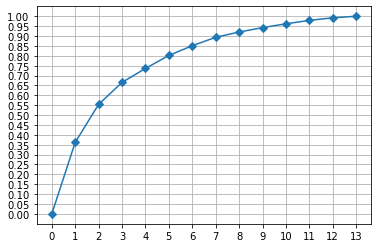

In [14]:
#累積寄与率
import matplotlib.pyplot as plt
import numpy as np

cum_exp_var_ratio = np.hstack([0, pcamodel.explained_variance_ratio_]).cumsum()
plt.plot(cum_exp_var_ratio, 'D-')
plt.xticks(range(14))
plt.yticks(np.arange(0,1.05,0.05))
plt.grid()
plt.show()

In [15]:
#各主成分の固有ベクトル
pca_vec_df = pd.DataFrame(pcamodel.components_, columns=df_wine.columns, 
                          index=["PC{}".format(x + 1) for x in range(len(pca_df.columns))])
print(pca_vec_df)

       alcohol  malic_acid       ash  alcalinity_of_ash  magnesium  \
PC1   0.144329   -0.245188 -0.002051          -0.239320   0.141992   
PC2  -0.483652   -0.224931 -0.316069           0.010591  -0.299634   
PC3  -0.207383    0.089013  0.626224           0.612080   0.130757   
PC4  -0.017856    0.536890 -0.214176           0.060859  -0.351797   
PC5  -0.265664    0.035214 -0.143025           0.066103   0.727049   
PC6  -0.213539   -0.536814 -0.154475           0.100825  -0.038144   
PC7  -0.056396    0.420524 -0.149171          -0.286969   0.322883   
PC8  -0.396139   -0.065827  0.170260          -0.427970   0.156361   
PC9   0.508619   -0.075283 -0.307694           0.200449   0.271403   
PC10  0.211605   -0.309080 -0.027125           0.052799   0.067870   
PC11 -0.225917    0.076486 -0.498691           0.479314   0.071289   
PC12 -0.266286    0.121696 -0.049622          -0.055743   0.062220   
PC13  0.014970    0.025964 -0.141218           0.091683   0.056774   

      total_phenols